In [2]:
import numpy as np
import matplotlib.pyplot as plt

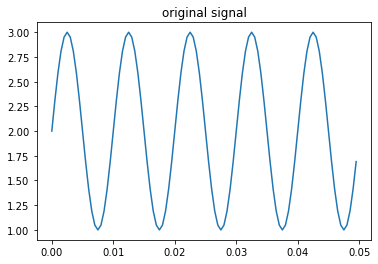

In [13]:
#1. generate sinosuidal waveform
f = 100  #frequency of signal
T = 1/f
t = np.arange(0,0.05,0.0005)
dc_offset = 2
sig = np.sin(2*np.pi*f*t) + dc_offset
plt.plot(t,sig)
plt.title("original signal")
plt.show()

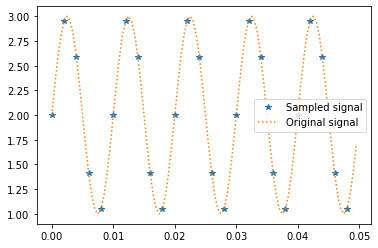

In [14]:
#Sampling
fs = 5*f  #choose fs>2f
ts = np.arange(0,0.05,1/fs)
sampled_sig = np.sin(2*np.pi*f*ts) + dc_offset
plt.plot(ts,sampled_sig,"*",label="Sampled signal")
plt.plot(t,sig,":",label="Original signal")
plt.legend()
plt.show()

In [15]:
def quantise(L,sig):
    step = (np.max(sig)-np.min(sig))/L
    levels = np.arange(np.min(sig),np.max(sig)+step,step)
    return levels

In [6]:
def encode(L,levels, sampled_sig):
    quantised_sig = np.zeros_like(sampled_sig) #List for quantised signals
    bin_list = np.zeros_like(sampled_sig)
    for i in range(L):
        m = np.mean([levels[i],levels[i+1]])  
        quantised_sig[(sampled_sig>=levels[i]) & (sampled_sig<levels[i+1])] = m 
        bin_list[(sampled_sig>=levels[i]) & (sampled_sig<levels[i+1])] = i

    PCM = "".join([np.binary_repr(int(x),width=n) for x in bin_list])
    return PCM,quantised_sig

No of levels: 8
Values of levels: [1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
PCM encoded value: 100100101110111111111111111111110101100011010001000000000000000000001010011011100101110111111111111111111110101100011010001000000000000000000001010011011100101110111111111111111111110101100011010001000000000000000000001010011100100101110111111111111111111110101100011010001000000000000000000001010011011100101110111111111111111111110101100011010001000000000000000000001010011


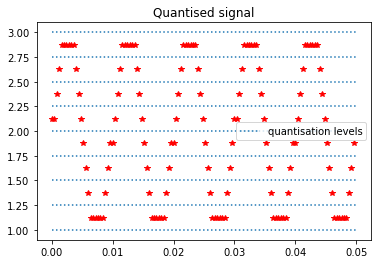

In [7]:
n = 3  #Number of bits
L=2**n  #number of quantisation levels(or take input from user)
levels = quantise(L,sig)
print("No of levels:",L)
print("Values of levels:",levels)
PCM,quantised_sig = encode(L,levels, sampled_sig)
print("PCM encoded value:", PCM)
plt.plot(ts,quantised_sig,"r*")
plt.hlines(levels,0,0.05,linestyles=":",label="quantisation levels")
plt.title("Quantised signal")
plt.legend()
plt.show()

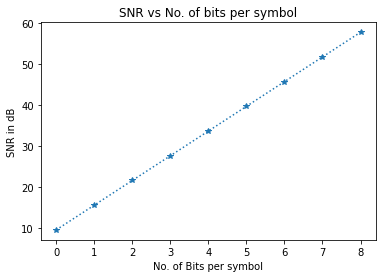

In [22]:
no_of_bits = 10
SNR= []
# snr_theory = []

for n in range(1,no_of_bits):
    L=2**n  #number of quantisation levels(or take input from user)
    levels = quantise(L,sig)
    PCM,quantised_sig = encode(L,levels, sampled_sig)

    power = np.average(sig**2)
    noise = np.sum(sampled_sig-quantised_sig)
    # snr_theory.append(6.53+6.02*n)
    SNR.append(20*np.log10(power/noise))

plt.plot(SNR,"*:")
# plt.plot(snr_theory,"o:")
plt.xlabel("No. of Bits per symbol")
plt.ylabel("SNR in dB")
plt.title("SNR vs No. of bits per symbol")
plt.show()